In [29]:
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
lst = glob.glob('*서울시*.xlsx')
print(len(lst))
lst

12


['2018년 04월 서울시 차량통행속도.xlsx',
 '2018년 05월 서울시 차량통행속도.xlsx',
 '2018년 06월 서울시 차량통행속도.xlsx',
 '2018년 07월 서울시 차량통행속도.xlsx',
 '2018년 08월 서울시 차량통행속도.xlsx',
 '2018년 09월 서울시 차량통행속도.xlsx',
 '2018년 10월 서울시 차량통행속도.xlsx',
 '2018년 11월 서울시 차량통행속도.xlsx',
 '2018년 12월 서울시 차량통행속도.xlsx',
 '2019년 01월 서울시 차량통행속도.xlsx',
 '2019년 02월 서울시 차량통행속도.xlsx',
 '2019년 03월 서울시 차량통행속도.xlsx']

In [14]:
car4 = pd.read_excel('2018년 04월 서울시 차량통행속도.xlsx')
car4.drop(['시점명','종점명'],axis=1,inplace=True)
print(car4.columns)

Index(['일자', '요일', '도로명', '링크아이디', '방향', '거리', '기능유형구분', '도심/외곽구분', '권역구분',
       '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '24시'],
      dtype='object')


In [13]:
car12 = pd.read_excel('2018년 12월 서울시 차량통행속도.xlsx')
car12.drop(['도로명','시점명','종점명'],axis=1,inplace=True)
print(car12.columns)

Index(['일자', '요일', '도로명', '링크아이디', '방향', '거리', '차선수', '기능유형구분', '도심/외곽구분',
       '권역구분', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시',
       '20시', '21시', '22시', '23시', '24시'],
      dtype='object')


In [15]:
car = pd.melt(car12, id_vars=car12.columns[:10])
car.head()

,일자,요일,도로명,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
0,20181201,토,4.19로,1080012200,상행,1179,1,보조간선도로,외곽,강북구,01시,NaN
1,20181201,토,4.19로,1080012800,상행,352,1,보조간선도로,외곽,강북구,01시,NaN
2,20181201,토,4.19로,1080012700,하행,354,2,보조간선도로,외곽,강북구,01시,NaN
3,20181201,토,4.19로,1080012100,하행,1190,2,보조간선도로,외곽,강북구,01시,NaN
4,20181201,토,가락로,1230024700,상행,844,1,기타도로,외곽,송파구,01시,NaN


In [27]:
car12.isnull().sum()

일자            0
요일            0
도로명           0
링크아이디         0
방향            0
거리            0
차선수           0
기능유형구분        0
도심/외곽구분       0
권역구분          0
01시        5090
02시        4921
03시        5084
04시        5016
05시        5180
06시        5249
07시        5073
08시        4955
09시        4825
10시        4834
11시        9549
12시         169
13시         222
14시         133
15시         199
16시         290
17시         208
18시         158
19시         194
20시         166
21시         110
22시         248
23시         127
24시         355
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car["요일"] = lb_make.fit_transform(car["요일"])
car["링크아이디"] = lb_make.fit_transform(car["링크아이디"])
car["방향"] = lb_make.fit_transform(car["방향"])
car["기능유형구분"] = lb_make.fit_transform(car["기능유형구분"])
car["도심/외곽구분"] = lb_make.fit_transform(car["도심/외곽구분"])
car["권역구분"] = lb_make.fit_transform(car["권역구분"])
car["variable"] = lb_make.fit_transform(car["variable"])

print(car.shape)
car.head()

(3519312, 11)


,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
0,20181201,5,1504,0,1179,1,2,1,2,0,NaN
1,20181201,5,1510,0,352,1,2,1,2,0,NaN
2,20181201,5,1509,1,354,2,2,1,2,0,NaN
3,20181201,5,1503,1,1190,2,2,1,2,0,NaN
4,20181201,5,4274,0,844,1,0,1,17,0,NaN


In [46]:
car_drop_na.dropna(axis=0)
print(car_drop_na.shape)
print('제거한 행의 갯수 :',car.shape[0]-car_drop_na.shape[0]) #6만개

(3456957, 11)
제거한 행의 갯수 : 62355


In [57]:
X_data = car_drop_na.drop(['일자','value'],axis=1,inplace=False)
y_target = car_drop_na['value']
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

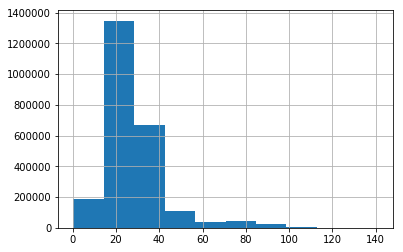

In [48]:
y_train.hist()

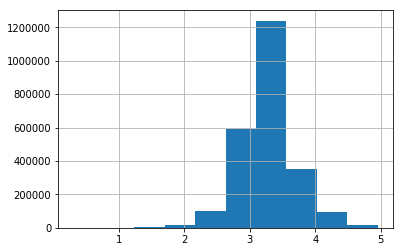

In [49]:
np.log1p(y_train).hist()

In [62]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)    
    r2 = r2_score(y_test, pred)   
    
    print('###',model.__class__.__name__,'###')
    print('MSE: {0:.3f}, R2: {1:.3F}'.format(mse, r2*100))

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE: 148.080, R2: 20.348


In [65]:
y_target_log = np.log1p(y_target)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target_log ,test_size=0.3, random_state=156)

lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
MSE: 152.664, R2: 17.882


In [69]:
X_data_ohe = pd.get_dummies(X_data, columns=['요일','variable'])

X_train , X_test , y_train , y_test = train_test_split(X_data_ohe , y_target_log ,test_size=0.3, random_state=156)

lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
MSE: 142.863, R2: 23.154


In [70]:
X_train , X_test , y_train , y_test = train_test_split(X_data_ohe , y_target,test_size=0.3, random_state=156)

lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train, y_test,is_expm1=False)

### LinearRegression ###
MSE: 138.867, R2: 25.304
